<a href="https://colab.research.google.com/github/sijieli0801/MachineLearning/blob/main/2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries and Data Sets

In [ ]:
!pip install cesium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255 kB 7.2 MB/s 
     |████████████████████████████████| 554 kB 10.7 MB/s 
  Created wheel for cesium: filename=cesium-0.10.1-cp37-cp37m-linux_x86_64.whl size=405310 sha256=b2005836b380f85e506711000cfada4d214dbff883a294ba6b7e8e0afb8a53c4
  Stored in directory: /root/.cache/pip/wheels/0c/1a/fd/f7ba325b19317a3281ec0cf419a37802758b344b5858f449e2
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43818 sha256=401243e6e3a01fb641930b3339da2020308e14645db450241ace7e60b2c0ad5b
  Stored in directory: /root/.cache/pip/wheels/1f/c1/4c/8de278f816259b4f67e2356c0bda260a593375661e400bf31f
Successfully built cesium gatspy


In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/drive')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cesium import featurize
from cesium import datasets
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Mounted at /drive


In [ ]:
dta = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/cleaned_dta.csv', index_col = 'code')
plan = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_PLAN.csv')
med = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_MED.csv')
exam = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_EXAM.csv')
ros = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_ROS.csv')
immune = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_immune.csv')
allergy = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_ALLERGY.csv')

In [ ]:
dta

,index,PATIENT_NUM,ADMIT_DATE,DISCH_DATE,GENDER,VISIT_TYPE,AGE,FAMILY_HYPERTENSION_NUM,HYPERTENSION_VISIT,HYPERTENSION_SEVERITY,...,RESPIRATION,RESPIRATION_DESCRIPTION,PULSEOXYGEN,PULSEOXYGEN_DESCRIPTION,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD
code,,,,,,,,,,,,,,,,,,,,,
1166192,0,1166159,1996-03-18,1996-03-18,1,6.0,75.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1166525,1,1166159,1996-03-19,1996-03-19,1,98.0,75.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1166543,2,1166159,1996-03-25,1996-03-25,1,6.0,75.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1167065,3,1166159,1996-03-18,1996-03-18,1,96.0,75.0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1167480,4,1166159,1996-03-25,1996-03-25,1,96.0,75.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31790336,242,5009829,2014-12-11,2014-12-11,1,8.0,100.0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
31846984,243,5009829,2015-01-10,2015-01-10,1,120.0,100.0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
31954761,244,5009829,2015-03-12,2015-03-12,1,13.0,100.0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0


In [ ]:
file_list = []
for filename in os.listdir('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data'):
    if filename.endswith('.json'):
        file_list.append(filename.split('_')[0])

# EDA: Fact Table

## Correlation Table and Chart

In [ ]:
dta['HYPERTENSION_SEVERITY'].value_counts()

2    33663
0    15056
1     7747
3     1251
Name: HYPERTENSION_SEVERITY, dtype: int64

In [ ]:
Data_hyper = dta[(dta['HYPERTENSION_VISIT']==1)]

In [ ]:
corr_fact = Data_hyper.corr()
corr_fact.style.background_gradient(cmap='coolwarm')

,index,PATIENT_NUM,GENDER,VISIT_TYPE,AGE,FAMILY_HYPERTENSION_NUM,HYPERTENSION_VISIT,HYPERTENSION_SEVERITY,HYPERTENSION_STATUS,DIASTOLIC_BP,SYSTOLIC_BP,WEIGHT,HEIGHT,TEMPERATURE,PULSE,RESPIRATION,PULSEOXYGEN,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD
index,1.000000,-0.230586,-0.121301,0.003481,0.417574,-0.135903,nan,0.077473,0.271793,-0.267893,-0.036120,-0.009451,0.016936,0.015547,0.075503,0.075259,-0.054070,-0.213683,-0.129656,0.137981,-0.043183,-0.132121,-0.005615
PATIENT_NUM,-0.230586,1.000000,0.085081,0.053608,-0.063399,0.024247,nan,-0.004430,0.044436,0.015364,0.005497,0.011497,0.026219,0.051982,0.030797,0.207029,0.032983,-0.003132,-0.042534,-0.186304,-0.146992,0.002729,0.002246
GENDER,-0.121301,0.085081,1.000000,0.083194,-0.116180,-0.060848,nan,0.007320,-0.026479,-0.030158,-0.075474,0.077918,0.084012,0.028401,-0.107693,-0.056524,0.076452,0.198733,-0.183733,-0.081854,0.024972,0.142097,-0.004114
VISIT_TYPE,0.003481,0.053608,0.083194,1.000000,-0.055660,-0.009616,nan,-0.017634,-0.000833,-0.014821,-0.023457,0.003855,0.050087,0.012889,0.044890,-0.056125,0.020990,0.065889,-0.006441,-0.028876,0.026313,0.033640,0.003334
AGE,0.417574,-0.063399,-0.116180,-0.055660,1.000000,-0.239951,nan,0.042808,0.112577,-0.292004,0.006748,-0.034065,-0.126322,-0.018532,-0.042028,0.074713,-0.039981,-0.242918,0.059274,0.051089,0.038954,-0.088938,-0.010405
FAMILY_HYPERTENSION_NUM,-0.135903,0.024247,-0.060848,-0.009616,-0.239951,1.000000,nan,-0.031945,-0.041334,0.157782,0.018828,-0.002576,-0.084272,-0.120098,-0.010358,-0.093534,-0.153398,0.173361,-0.086228,0.028140,0.024803,0.014647,0.006526
HYPERTENSION_VISIT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HYPERTENSION_SEVERITY,0.077473,-0.004430,0.007320,-0.017634,0.042808,-0.031945,nan,1.000000,0.618809,-0.109123,-0.093155,-0.006862,0.128372,0.106709,-0.014087,-0.080762,0.108327,-0.057825,0.071846,0.016148,0.054298,0.060681,-0.012881
HYPERTENSION_STATUS,0.271793,0.044436,-0.026479,-0.000833,0.112577,-0.041334,nan,0.618809,1.000000,-0.244057,-0.187717,-0.019300,0.053001,0.113998,0.043213,-0.000944,-0.027306,0.001871,0.017509,0.050915,-0.017480,0.025919,0.002080
DIASTOLIC_BP,-0.267893,0.015364,-0.030158,-0.014821,-0.292004,0.157782,nan,-0.109123,-0.244057,1.000000,0.399765,-0.000645,0.110865,0.037231,0.163340,0.028894,-0.043941,0.043105,0.026551,0.026074,-0.010416,0.043672,0.008821


## HYPERTENSION SEVERITY

### Univariate

In [ ]:
dta.FAMILY_HYPERTENSION_NUM[dta.FAMILY_HYPERTENSION_NUM.isnull()].count()

0

In [ ]:
dta.HYPERTENSION_SEVERITY.value_counts()

2    33663
0    15056
1     7747
3     1251
Name: HYPERTENSION_SEVERITY, dtype: int64

In [ ]:
HS = pd.concat({'Unknown': dta[dta.HYPERTENSION_SEVERITY == 0].groupby('PATIENT_NUM')['index'].count(), 'Red': dta[dta.HYPERTENSION_SEVERITY == 1].groupby('PATIENT_NUM')['index'].count(),  'Yellow': dta[dta.HYPERTENSION_SEVERITY == 2].groupby('PATIENT_NUM')['index'].count(), 'Green': dta[dta.HYPERTENSION_SEVERITY == 3].groupby('PATIENT_NUM')['index'].count()}, axis = 1)

In [ ]:
HS.fillna(0, inplace = True)

In [ ]:
HS = HS.astype('int')

In [ ]:
HS['Unknown %'] = HS.Unknown / (HS.Unknown + HS.Red + HS.Yellow + HS.Green) * 100
HS['Red %'] = HS.Red / (HS.Unknown + HS.Red + HS.Yellow + HS.Green) * 100
HS['Yellow %'] = HS.Yellow / (HS.Unknown + HS.Red + HS.Yellow + HS.Green) * 100
HS['Green %'] = HS.Green / (HS.Unknown + HS.Red + HS.Yellow + HS.Green) * 100

In [ ]:
HS

,Unknown,Red,Yellow,Green,Unknown %,Red %,Yellow %,Green %
PATIENT_NUM,,,,,,,,
1091,0,0,124,0,0.0,0.000000,100.000000,0.00000
83369,0,0,310,0,0.0,0.000000,100.000000,0.00000
127948,0,0,95,10,0.0,0.000000,90.476190,9.52381
135797,0,0,189,0,0.0,0.000000,100.000000,0.00000
157037,0,0,98,0,0.0,0.000000,100.000000,0.00000
...,...,...,...,...,...,...,...,...
28305113,0,60,0,0,0.0,100.000000,0.000000,0.00000
29154764,0,52,37,0,0.0,58.426966,41.573034,0.00000
30048752,0,0,72,0,0.0,0.000000,100.000000,0.00000


In [ ]:
CLUSTER = HS.iloc[:,4:]

In [ ]:
HS.iloc[:,4:].describe()

,Unknown %,Red %,Yellow %,Green %
count,278.000000,278.000000,278.000000,278.000000
mean,19.424460,14.703193,63.557326,2.315021
std,39.633151,29.888518,43.030362,9.192721
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.308642,0.000000
50%,0.000000,0.000000,91.181406,0.000000
75%,0.000000,8.936046,100.000000,0.000000
max,100.000000,100.000000,100.000000,75.159236


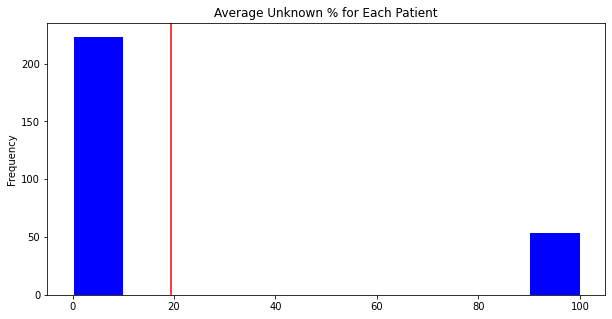

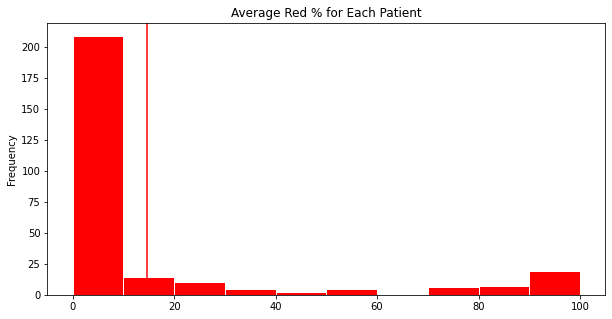

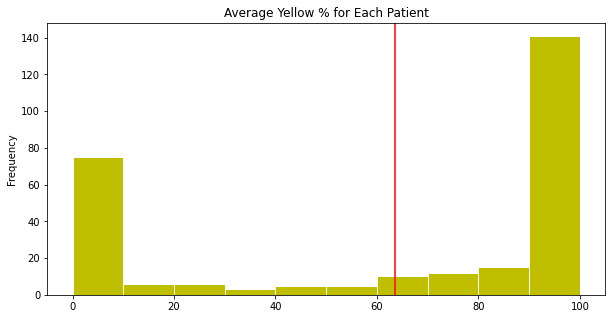

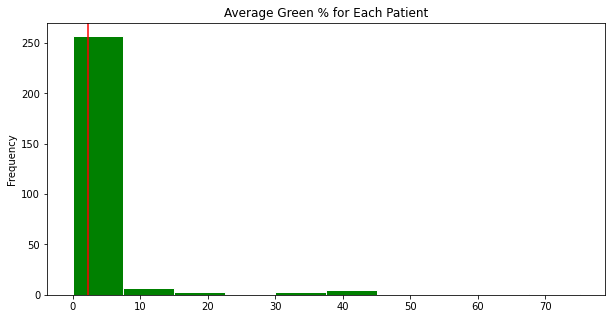

In [ ]:
HS['Unknown %'].plot.hist(color = 'b', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HS['Unknown %'].mean(), color='r')
plt.title('Average Unknown % for Each Patient')
plt.show()
HS['Red %'].plot.hist(color = 'r', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HS['Red %'].mean(), color='r')
plt.title('Average Red % for Each Patient')
plt.show()
HS['Yellow %'].plot.hist(color = 'y', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HS['Yellow %'].mean(), color='r')
plt.title('Average Yellow % for Each Patient')
plt.show()
HS['Green %'].plot.hist(color = 'g', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HS['Green %'].mean(), color='r')
plt.title('Average Green % for Each Patient')
plt.show()

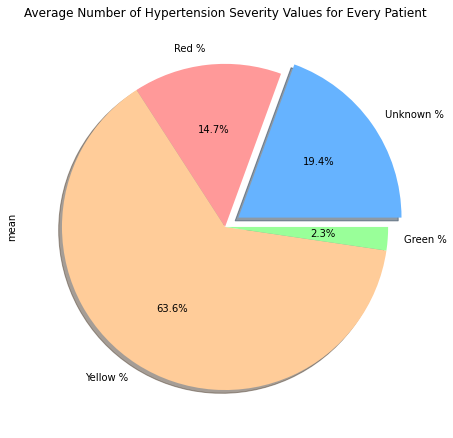

In [ ]:
HS.iloc[:,4:].describe().iloc[1].plot.pie(colors = ['#66b3ff', '#ff9999','#ffcc99', '#99ff99'], shadow = True, explode = (0.1, 0, 0, 0), figsize=(15, 7.5), autopct='%1.1f%%')
plt.title('Average Number of Hypertension Severity Values for Every Patient')
plt.show()

## HYPERTENSION VISIT

### Univariate

In [ ]:
dta[dta.HYPERTENSION_VISIT == 1].groupby('PATIENT_NUM')['HYPERTENSION_VISIT'].count()

PATIENT_NUM
1091        39
83369       22
127948      22
135797      37
157037       4
            ..
28305113    17
29154764    26
30048752    17
31151244     1
32109245    14
Name: HYPERTENSION_VISIT, Length: 277, dtype: int64

In [ ]:
HV = pd.concat({'Hypertension Visits': dta[dta.HYPERTENSION_VISIT == 1].groupby('PATIENT_NUM')['HYPERTENSION_VISIT'].count(), 'Total_Number_of_Visits': dta.groupby('PATIENT_NUM').index.count()}, axis = 1)
HV['Hypertension_Visits %'] = HV['Hypertension Visits'] / HV['Total_Number_of_Visits'] * 100

In [ ]:
HV

,Hypertension Visits,Total_Number_of_Visits,Hypertension_Visits %
PATIENT_NUM,,,
1091,39.0,124,31.451613
83369,22.0,310,7.096774
127948,22.0,105,20.952381
135797,37.0,189,19.576720
157037,4.0,98,4.081633
...,...,...,...
28305113,17.0,60,28.333333
29154764,26.0,89,29.213483
30048752,17.0,72,23.611111


In [ ]:
CLUSTER = CLUSTER.merge(HV.iloc[:, 1:], on = 'PATIENT_NUM')

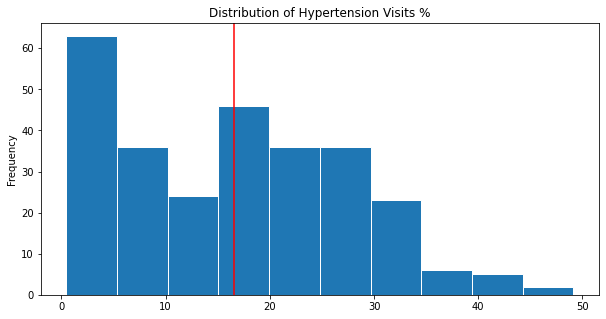

In [ ]:
HV['Hypertension_Visits %'].plot.hist(figsize = (10, 5), edgecolor = 'w')
plt.axvline(HV['Hypertension_Visits %'].mean(), color='r')
plt.title('Distribution of Hypertension Visits %')
plt.show()

In [ ]:
HV['Hypertension_Visits %'].describe()

count    277.000000
mean      16.566123
std       10.963239
min        0.457666
25%        5.825243
50%       16.585366
75%       25.000000
max       49.137931
Name: Hypertension_Visits %, dtype: float64

## HYPERTENSION STATUS

### Univariate

In [ ]:
dta['HYPERTENSION_STATUS'][dta['HYPERTENSION_STATUS'].isnull()].count()

0

In [ ]:
dta.HYPERTENSION_STATUS.value_counts()

3    22220
2    16034
0    14705
1     4758
Name: HYPERTENSION_STATUS, dtype: int64

In [ ]:
HST = pd.concat({'Unknown': dta[dta.HYPERTENSION_STATUS == 0].groupby('PATIENT_NUM')['index'].count(), 'Red': dta[dta.HYPERTENSION_STATUS == 1].groupby('PATIENT_NUM')['index'].count(),  'Yellow': dta[dta.HYPERTENSION_STATUS == 2].groupby('PATIENT_NUM')['index'].count(), 'Green': dta[dta.HYPERTENSION_STATUS == 3].groupby('PATIENT_NUM')['index'].count()}, axis = 1)

In [ ]:
HST.fillna(0, inplace = True)

In [ ]:
HST = HST.astype('int')

In [ ]:
HST['HST Unknown %'] = HST.Unknown / (HST.Unknown + HST.Red + HST.Yellow + HST.Green) * 100
HST['HST Red %'] = HST.Red / (HST.Unknown + HST.Red + HST.Yellow + HST.Green) * 100
HST['HST Yellow %'] = HST.Yellow / (HST.Unknown + HST.Red + HST.Yellow + HST.Green) * 100
HST['HST Green %'] = HST.Green / (HST.Unknown + HST.Red + HST.Yellow + HST.Green) * 100

In [ ]:
HST

,Unknown,Red,Yellow,Green,HST Unknown %,HST Red %,HST Yellow %,HST Green %
PATIENT_NUM,,,,,,,,
1091,0,0,27,97,0.0,0.000000,21.774194,78.225806
83369,0,0,0,310,0.0,0.000000,0.000000,100.000000
127948,0,0,37,68,0.0,0.000000,35.238095,64.761905
135797,0,0,131,58,0.0,0.000000,69.312169,30.687831
157037,0,0,98,0,0.0,0.000000,100.000000,0.000000
...,...,...,...,...,...,...,...,...
28305113,0,0,46,14,0.0,0.000000,76.666667,23.333333
29154764,0,5,15,69,0.0,5.617978,16.853933,77.528090
30048752,0,0,7,65,0.0,0.000000,9.722222,90.277778


In [ ]:
CLUSTER = CLUSTER.merge(HST.iloc[:,4:], on = 'PATIENT_NUM')

In [ ]:
HST.iloc[:,4:].describe()

,HST Unknown %,HST Red %,HST Yellow %,HST Green %
count,278.000000,278.000000,278.000000,278.000000
mean,19.064748,10.290876,30.504472,40.139904
std,39.352009,23.692582,29.161779,31.286190
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.696225
50%,0.000000,0.000000,22.143975,37.354312
75%,0.000000,4.456373,58.226661,64.017288
max,100.000000,100.000000,100.000000,100.000000


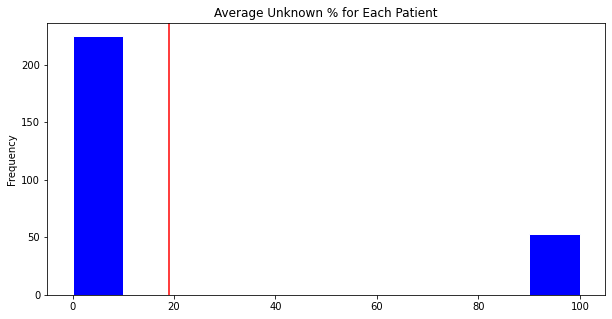

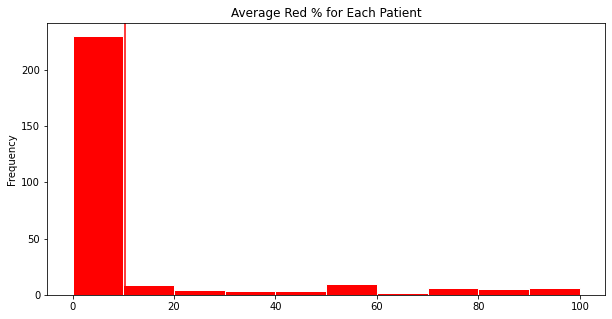

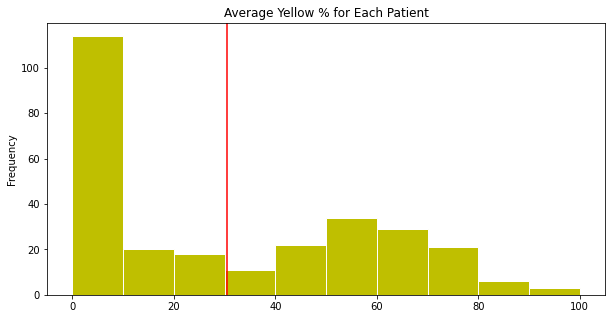

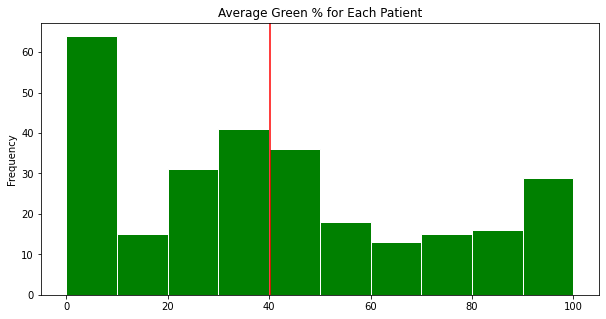

In [ ]:
HST['HST Unknown %'].plot.hist(color = 'b', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HST['HST Unknown %'].mean(), color='r')
plt.title('Average Unknown % for Each Patient')
plt.show()
HST['HST Red %'].plot.hist(color = 'r', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HST['HST Red %'].mean(), color='r')
plt.title('Average Red % for Each Patient')
plt.show()
HST['HST Yellow %'].plot.hist(color = 'y', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HST['HST Yellow %'].mean(), color='r')
plt.title('Average Yellow % for Each Patient')
plt.show()
HST['HST Green %'].plot.hist(color = 'g', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HST['HST Green %'].mean(), color='r')
plt.title('Average Green % for Each Patient')
plt.show()

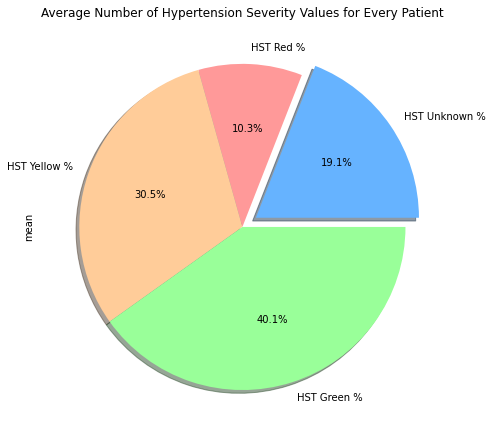

In [ ]:
HST.iloc[:,4:].describe().iloc[1].plot.pie(colors = ['#66b3ff', '#ff9999','#ffcc99', '#99ff99'], shadow = True, explode = (0.1, 0, 0, 0), figsize=(15, 7.5), autopct='%1.1f%%')
plt.title('Average Number of Hypertension Severity Values for Every Patient')
plt.show()

## INDEX

### Univariate

In [ ]:
len(dta.index[dta.index.isnull()])

0

In [ ]:
dta.groupby('PATIENT_NUM')['index'].count().sort_values()

PATIENT_NUM
31151244      5
16852584     47
26797076     50
26104907     52
5643472      56
           ... 
6444150     481
1175181     567
261519      570
1715533     659
4752824     785
Name: index, Length: 278, dtype: int64

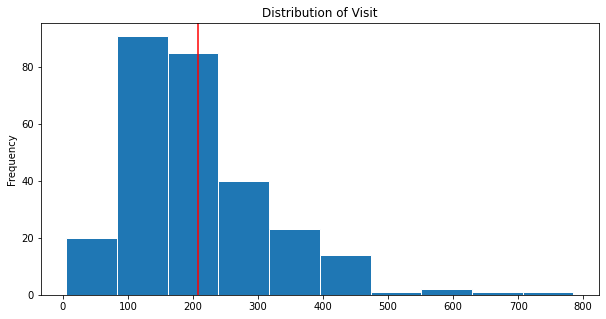

In [ ]:
dta.groupby('PATIENT_NUM')['index'].count().sort_values().plot.hist(figsize = (10, 5), edgecolor = 'w')
plt.axvline(dta.groupby('PATIENT_NUM')['index'].count().sort_values().mean(), color='r')
plt.title('Distribution of Visit')
plt.show()

In [ ]:
dta.groupby('PATIENT_NUM')['index'].count().sort_values().describe()

count    278.000000
mean     207.615108
std      109.984013
min        5.000000
25%      127.250000
50%      191.500000
75%      259.500000
max      785.000000
Name: index, dtype: float64

### Multivariate

In [ ]:
for file in file_list:
  if len(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY != 0][dta.PATIENT_NUM == file]) == 0:
    continue
  else:
    plt.scatter(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 1][dta.PATIENT_NUM == file]['index'], dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 1][dta.PATIENT_NUM == file]['HYPERTENSION_SEVERITY'], color = 'r')
    plt.plot(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 1][dta.PATIENT_NUM == file]['index'], dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 1][dta.PATIENT_NUM == file]['HYPERTENSION_SEVERITY'], color = 'r')
    plt.scatter(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 2][dta.PATIENT_NUM == file]['index'], dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 2][dta.PATIENT_NUM == file]['HYPERTENSION_SEVERITY'], color = 'y')
    plt.plot(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 2][dta.PATIENT_NUM == file]['index'], dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 2][dta.PATIENT_NUM == file]['HYPERTENSION_SEVERITY'], color = 'y')
    plt.scatter(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 3][dta.PATIENT_NUM == file]['index'], dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 3][dta.PATIENT_NUM == file]['HYPERTENSION_SEVERITY'], color = 'g')
    plt.plot(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 3][dta.PATIENT_NUM == file]['index'], dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 3][dta.PATIENT_NUM == file]['HYPERTENSION_SEVERITY'], color = 'g')
    plt.xlabel('Visit')
    plt.ylabel('Hypertension Severity')
    plt.title('Hypertension Severity VS Visit')
    plt.show()

## ADMIT DATE

### Univariate

In [ ]:
dta.ADMIT_DATE[dta.ADMIT_DATE.isnull()].count()

0

In [ ]:
AD = pd.concat({'MIN_ADMIT_DATE': dta.groupby('PATIENT_NUM')['ADMIT_DATE'].min(), 'MAX_ADMIT_DATE': dta.groupby('PATIENT_NUM')['ADMIT_DATE'].max(),  'Total_Number_of_Visits': dta.groupby('PATIENT_NUM').index.count()}, axis = 1)
AD['MIN_ADMIT_DATE'] = pd.to_datetime(AD['MIN_ADMIT_DATE'])
AD['MAX_ADMIT_DATE'] = pd.to_datetime(AD['MAX_ADMIT_DATE'])
AD['Days'] = AD['MAX_ADMIT_DATE'] - AD['MIN_ADMIT_DATE']
AD['Days_Int'] = AD['Days']/np.timedelta64(1, 'D')
AD['Years'] = AD['Days'] / np.timedelta64(1, 'Y')
AD['Years'] = AD['Years'].round().astype('int')
AD['Visit_Frequency (Days between Visit)'] = AD['Days_Int'] / AD['Total_Number_of_Visits']
AD = AD.drop(['Total_Number_of_Visits', 'Days', 'Days_Int'], axis = 1)

In [ ]:
AD

,MIN_ADMIT_DATE,MAX_ADMIT_DATE,Years,Visit_Frequency (Days between Visit)
PATIENT_NUM,,,,
1091,2004-10-06,2015-11-24,11,32.790323
83369,1996-08-19,2015-11-19,19,22.680645
127948,1994-05-22,2018-02-12,24,82.542857
135797,1995-11-14,2015-12-18,20,38.830688
157037,1995-11-07,2014-09-30,19,70.428571
...,...,...,...,...
28305113,2010-04-12,2015-02-25,5,29.666667
29154764,2011-06-17,2013-06-05,2,8.078652
30048752,2012-09-25,2016-02-05,3,17.055556


In [ ]:
CLUSTER = CLUSTER.merge(AD['Years'], on = 'PATIENT_NUM')

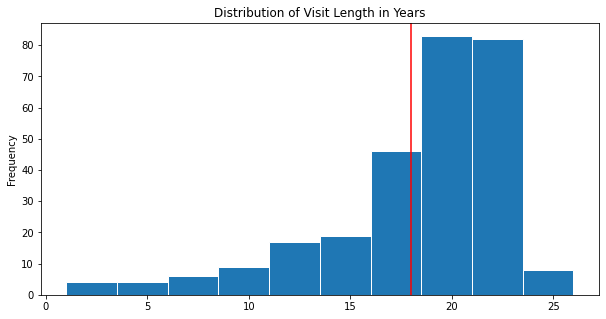

In [ ]:
AD.Years.plot.hist(figsize = (10, 5), edgecolor = 'w')
plt.axvline(AD.Years.mean(), color='r')
plt.title('Distribution of Visit Length in Years')
plt.show()

In [ ]:
AD.Years.describe()

count    278.000000
mean      18.010791
std        4.528676
min        1.000000
25%       16.000000
50%       19.000000
75%       21.000000
max       26.000000
Name: Years, dtype: float64

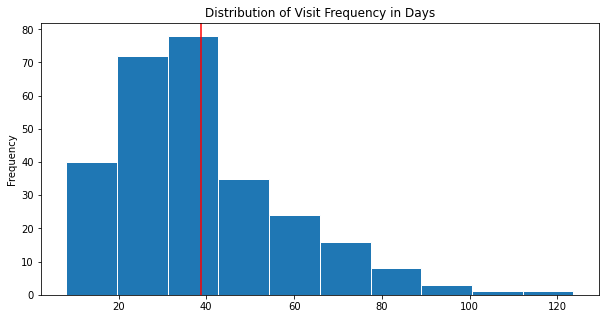

In [ ]:
AD['Visit_Frequency (Days between Visit)'].plot.hist(figsize = (10, 5), edgecolor = 'w')
plt.axvline(AD['Visit_Frequency (Days between Visit)'].mean(), color='r')
plt.title('Distribution of Visit Frequency in Days')
plt.show()

In [ ]:
AD['Visit_Frequency (Days between Visit)'].describe()

count    278.000000
mean      38.694296
std       19.281071
min        8.078652
25%       25.088649
50%       34.108492
75%       48.439460
max      123.642857
Name: Visit_Frequency (Days between Visit), dtype: float64

## GENDER

### Univariate

In [ ]:
dta.GENDER[dta.GENDER.isnull()].count()

0

In [ ]:
dta.groupby('PATIENT_NUM')['GENDER'].min()

PATIENT_NUM
1091        1
83369       1
127948      2
135797      1
157037      2
           ..
28305113    2
29154764    1
30048752    2
31151244    2
32109245    2
Name: GENDER, Length: 278, dtype: int64

In [ ]:
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['GENDER'].min(), on = 'PATIENT_NUM')

In [ ]:
dta.groupby('PATIENT_NUM')['GENDER'].min().value_counts()

1    141
2    137
Name: GENDER, dtype: int64

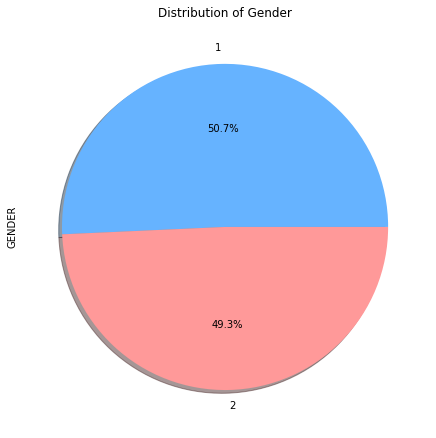

In [ ]:
dta.groupby('PATIENT_NUM')['GENDER'].min().value_counts().plot.pie(colors = ['#66b3ff', '#ff9999','#ffcc99', '#99ff99'], shadow = True, figsize=(15, 7.5), autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.show()

### Multivariate

In [ ]:
HSA = pd.concat({'Unknown': dta[dta.GENDER == 1][dta.HYPERTENSION_SEVERITY == 0].groupby('PATIENT_NUM')['index'].count(), 'Red': dta[dta.GENDER == 1][dta.HYPERTENSION_SEVERITY == 1].groupby('PATIENT_NUM')['index'].count(),  'Yellow': dta[dta.GENDER == 1][dta.HYPERTENSION_SEVERITY == 2].groupby('PATIENT_NUM')['index'].count(), 'Green': dta[dta.GENDER == 1][dta.HYPERTENSION_SEVERITY == 3].groupby('PATIENT_NUM')['index'].count()}, axis = 1)
HSA.fillna(0, inplace = True)
HSA = HSA.astype('int')
HSA['Unknown %'] = HSA.Unknown / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100
HSA['Red %'] = HSA.Red / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100
HSA['Yellow %'] = HSA.Yellow / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100
HSA['Green %'] = HSA.Green / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100

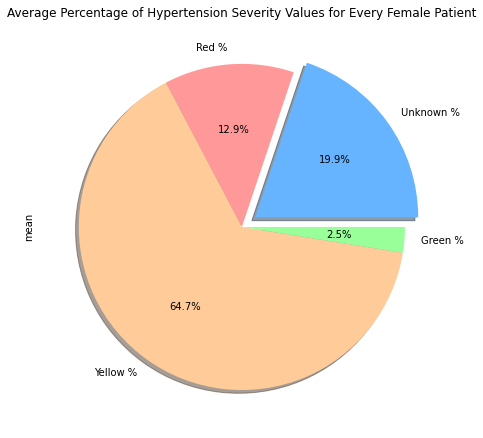

In [ ]:
HSA.iloc[:,4:].describe().iloc[1].plot.pie(colors = ['#66b3ff', '#ff9999','#ffcc99', '#99ff99'], shadow = True, explode = (0.1, 0, 0, 0), figsize=(15, 7.5), autopct='%1.1f%%')
plt.title('Average Percentage of Hypertension Severity Values for Every Female Patient')
plt.show()

In [ ]:
HSA = pd.concat({'Unknown': dta[dta.GENDER == 2][dta.HYPERTENSION_SEVERITY == 0].groupby('PATIENT_NUM')['index'].count(), 'Red': dta[dta.GENDER == 2][dta.HYPERTENSION_SEVERITY == 2].groupby('PATIENT_NUM')['index'].count(),  'Yellow': dta[dta.GENDER == 2][dta.HYPERTENSION_SEVERITY == 2].groupby('PATIENT_NUM')['index'].count(), 'Green': dta[dta.GENDER == 2][dta.HYPERTENSION_SEVERITY == 3].groupby('PATIENT_NUM')['index'].count()}, axis = 1)
HSA.fillna(0, inplace = True)
HSA = HSA.astype('int')
HSA['Unknown %'] = HSA.Unknown / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100
HSA['Red %'] = HSA.Red / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100
HSA['Yellow %'] = HSA.Yellow / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100
HSA['Green %'] = HSA.Green / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100

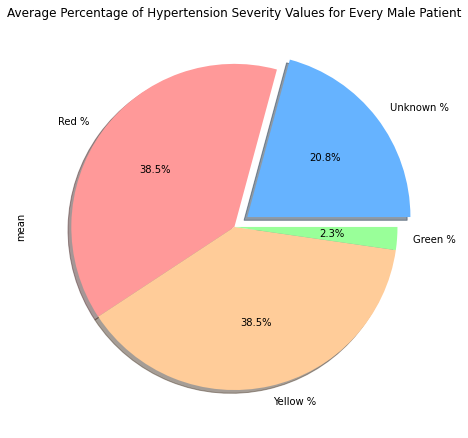

In [ ]:
HSA.iloc[:,4:].describe().iloc[1].plot.pie(colors = ['#66b3ff', '#ff9999','#ffcc99', '#99ff99'], shadow = True, explode = (0.1, 0, 0, 0), figsize=(15, 7.5), autopct='%1.1f%%')
plt.title('Average Percentage of Hypertension Severity Values for Every Male Patient')
plt.show()

## AGE

### Univariate

In [ ]:
dta.AGE[dta.AGE.isnull()].count()

0

In [ ]:
dta.groupby('PATIENT_NUM')['AGE'].min().astype('int')

PATIENT_NUM
1091        80
83369       65
127948      50
135797      50
157037      40
            ..
28305113    50
29154764    90
30048752    85
31151244    60
32109245    65
Name: AGE, Length: 278, dtype: int64

In [ ]:
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['AGE'].min().astype('int'), on = 'PATIENT_NUM')

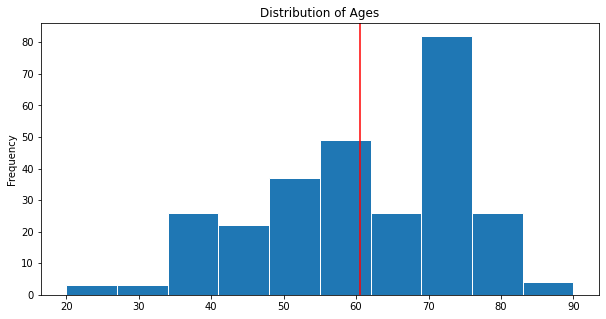

In [ ]:
dta.groupby('PATIENT_NUM')['AGE'].min().astype('int').plot.hist(figsize = (10, 5), edgecolor = 'w')
plt.axvline(dta.groupby('PATIENT_NUM')['AGE'].min().astype('int').mean(), color='r')
plt.title('Distribution of Ages')
plt.show()

In [ ]:
dta.groupby('PATIENT_NUM')['AGE'].min().astype('int').describe()

count    278.000000
mean      60.485612
std       13.563521
min       20.000000
25%       50.000000
50%       60.000000
75%       70.000000
max       90.000000
Name: AGE, dtype: float64

### Multivariate

In [ ]:
HS['First Age'] = dta.groupby('PATIENT_NUM')['AGE'].min().astype('int')

In [ ]:
HS

,Unknown,Red,Yellow,Green,Unknown %,Red %,Yellow %,Green %,First Age
PATIENT_NUM,,,,,,,,,
1091,0,0,124,0,0.0,0.000000,100.000000,0.00000,80
83369,0,0,310,0,0.0,0.000000,100.000000,0.00000,65
127948,0,0,95,10,0.0,0.000000,90.476190,9.52381,50
135797,0,0,189,0,0.0,0.000000,100.000000,0.00000,50
157037,0,0,98,0,0.0,0.000000,100.000000,0.00000,40
...,...,...,...,...,...,...,...,...,...
28305113,0,60,0,0,0.0,100.000000,0.000000,0.00000,50
29154764,0,52,37,0,0.0,58.426966,41.573034,0.00000,90
30048752,0,0,72,0,0.0,0.000000,100.000000,0.00000,85


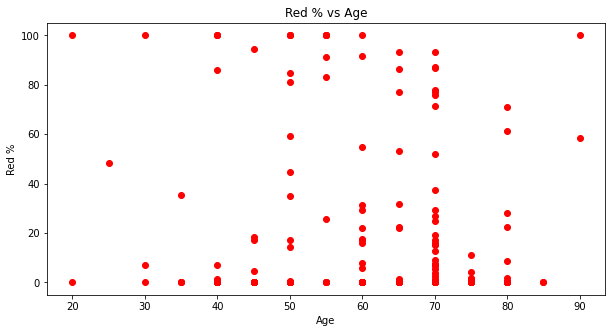

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(HS['First Age'], HS['Red %'], color = 'r')
plt.xlabel('Age')
plt.ylabel('Red %')
plt.title('Red % vs Age')
plt.show()

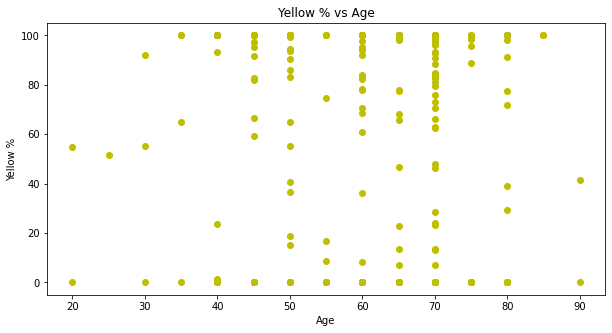

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(HS['First Age'], HS['Yellow %'], color = 'y')
plt.xlabel('Age')
plt.ylabel('Yellow %')
plt.title('Yellow % vs Age')
plt.show()

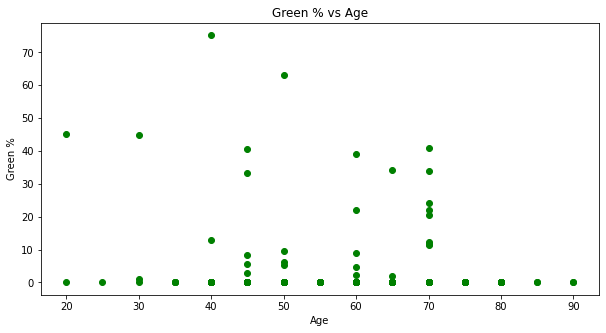

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(HS['First Age'], HS['Green %'], color = 'g')
plt.xlabel('Age')
plt.ylabel('Green %')
plt.title('Green % vs Age')
plt.show()

## FAMILY_HYPERTENSION_NUM

### Univariate

In [ ]:
dta.FAMILY_HYPERTENSION_NUM[dta.FAMILY_HYPERTENSION_NUM.isnull()].count()

0

In [ ]:
dta.groupby('PATIENT_NUM')['FAMILY_HYPERTENSION_NUM'].max()

PATIENT_NUM
1091        0
83369       0
127948      1
135797      0
157037      0
           ..
28305113    2
29154764    0
30048752    0
31151244    0
32109245    0
Name: FAMILY_HYPERTENSION_NUM, Length: 278, dtype: int64

In [ ]:
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['FAMILY_HYPERTENSION_NUM'].max(), on = 'PATIENT_NUM')

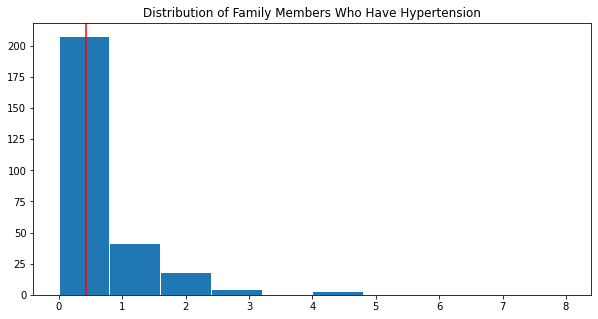

In [ ]:
plt.figure(figsize = (10, 5))
plt.hist(dta.groupby('PATIENT_NUM')['FAMILY_HYPERTENSION_NUM'].max(), edgecolor = 'w')
plt.axvline(dta.groupby('PATIENT_NUM')['FAMILY_HYPERTENSION_NUM'].max().mean(), color='r')
plt.title('Distribution of Family Members Who Have Hypertension')
plt.show()

In [ ]:
dta.groupby('PATIENT_NUM')['FAMILY_HYPERTENSION_NUM'].max().describe()

count    278.000000
mean       0.424460
std        0.942218
min        0.000000
25%        0.000000
50%        0.000000
75%        0.750000
max        8.000000
Name: FAMILY_HYPERTENSION_NUM, dtype: float64

### Multivariate

In [ ]:
HS['FAMILY_HYPERTENSION_NUM'] = dta.groupby('PATIENT_NUM')['FAMILY_HYPERTENSION_NUM'].max()

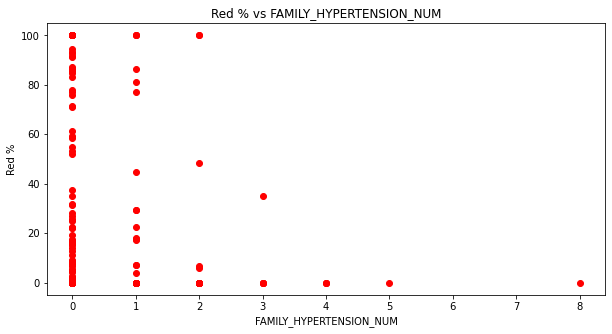

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(HS['FAMILY_HYPERTENSION_NUM'], HS['Red %'], color = 'r')
plt.xlabel('FAMILY_HYPERTENSION_NUM')
plt.ylabel('Red %')
plt.title('Red % vs FAMILY_HYPERTENSION_NUM')
plt.show()

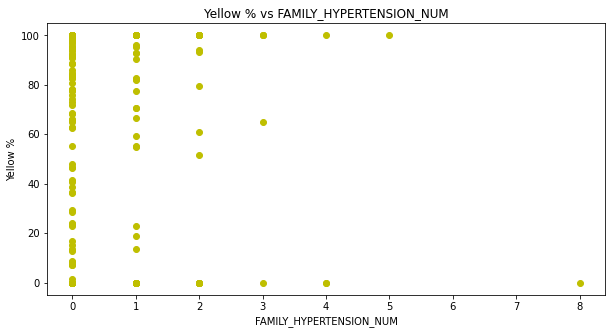

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(HS['FAMILY_HYPERTENSION_NUM'], HS['Yellow %'], color = 'y')
plt.xlabel('FAMILY_HYPERTENSION_NUM')
plt.ylabel('Yellow %')
plt.title('Yellow % vs FAMILY_HYPERTENSION_NUM')
plt.show()

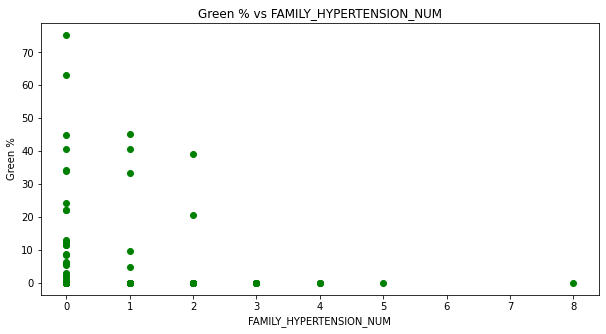

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(HS['FAMILY_HYPERTENSION_NUM'], HS['Green %'], color = 'g')
plt.xlabel('FAMILY_HYPERTENSION_NUM')
plt.ylabel('Green %')
plt.title('Green % vs FAMILY_HYPERTENSION_NUM')
plt.show()

## NON_SMOKER, NON_DRINKER, REGULAR_EXERCISER, NON_ALLERGY

In [ ]:
social_history = dta[['NON_SMOKER', 'NON_DRINKER', 'REGULAR_EXERCISER', 'NON_ALLERGY']].reset_index()

In [ ]:
social_history = social_history.drop(columns=['code'])

In [ ]:
social_history

,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
57712,1,0,0,0
57713,1,0,0,0
57714,1,0,0,0
57715,1,0,0,0


In [ ]:
df_social_hx = social_history.apply(pd.Series.value_counts)
df_social_hx.rename(index={0:'NO', 1: 'YES'}, inplace=True)
df_social_hx

,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY
NO,25168,42690,46295,51989
YES,32549,15027,11422,5728


In [ ]:
df_social_hx = df_social_hx.T
df_social_hx.index.name = 'Social Type'
df_social_hx

,NO,YES
Social Type,,
NON_SMOKER,25168,32549
NON_DRINKER,42690,15027
REGULAR_EXERCISER,46295,11422
NON_ALLERGY,51989,5728


In [ ]:
df_social_hx_prop = df_social_hx.apply(lambda x: x/sum(x), axis=1)
df_social_hx_prop

,NO,YES
Social Type,,
NON_SMOKER,0.436059,0.563941
NON_DRINKER,0.739643,0.260357
REGULAR_EXERCISER,0.802103,0.197897
NON_ALLERGY,0.900757,0.099243


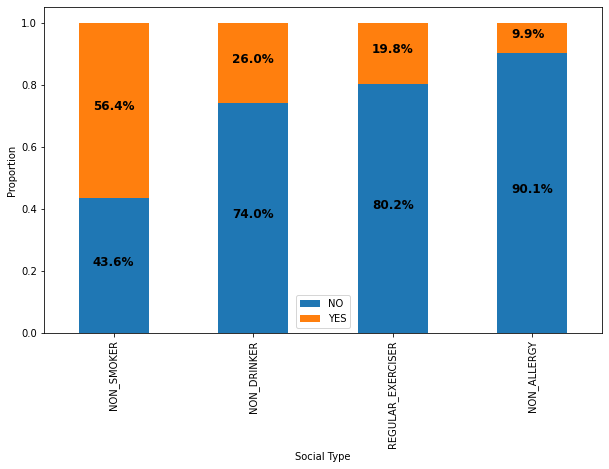

In [ ]:
#ax = df_social_hx.plot.barh(stacked=True, figsize=(10,7))
df_social_hx_prop.plot(kind='bar',
                        stacked=True, 
                        figsize=(10, 6))
plt.xlabel("Social Type")
plt.ylabel("Proportion")


for n, x in enumerate([*df_social_hx.index.values]):
    for (proportion, y_loc) in zip(df_social_hx_prop.loc[x],
                                   df_social_hx_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.15,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

In [ ]:
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['NON_SMOKER'].min(), on = 'PATIENT_NUM')
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['NON_DRINKER'].min(), on = 'PATIENT_NUM')
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['REGULAR_EXERCISER'].min(), on = 'PATIENT_NUM')
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['NON_ALLERGY'].min(), on = 'PATIENT_NUM')

In [ ]:
CLUSTER

,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,Years,GENDER,AGE,FAMILY_HYPERTENSION_NUM,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY
PATIENT_NUM,,,,,,,,,,,,,,,,,,
1091,0.0,0.000000,100.000000,0.00000,124,31.451613,0.0,0.000000,21.774194,78.225806,11,1,80,0,0,0,0,0
83369,0.0,0.000000,100.000000,0.00000,310,7.096774,0.0,0.000000,0.000000,100.000000,19,1,65,0,1,0,0,0
127948,0.0,0.000000,90.476190,9.52381,105,20.952381,0.0,0.000000,35.238095,64.761905,24,2,50,1,0,0,1,0
135797,0.0,0.000000,100.000000,0.00000,189,19.576720,0.0,0.000000,69.312169,30.687831,20,1,50,0,1,0,0,0
157037,0.0,0.000000,100.000000,0.00000,98,4.081633,0.0,0.000000,100.000000,0.000000,19,2,40,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28305113,0.0,100.000000,0.000000,0.00000,60,28.333333,0.0,0.000000,76.666667,23.333333,5,2,50,2,0,0,0,0
29154764,0.0,58.426966,41.573034,0.00000,89,29.213483,0.0,5.617978,16.853933,77.528090,2,1,90,0,1,0,0,0
30048752,0.0,0.000000,100.000000,0.00000,72,23.611111,0.0,0.000000,9.722222,90.277778,3,2,85,0,0,0,0,0


## HOS_PERIOD

In [ ]:
dta['HOS_PERIOD'].unique()

array([  0,   3,   1,   5,   6,   4,   9,  16,  10,  -4,   7,   2,  -6,
        26,   8,  18, -34,  64,  -7, -27, -68,  14,  -5, -54,  11,  13,
       339,  89, -69,  83,  15, 104,  12, -39,  22, -91,  31,  -3])

In [ ]:
dta['HOS_PERIOD'].value_counts()

 0      57087
 1        244
 2         93
 3         69
 4         60
 5         45
 6         32
 7         14
 8          8
 9          6
 11         6
 10         6
 12         6
 13         6
-4          5
 14         3
 15         2
 31         2
-27         2
-7          2
 26         2
 83         1
 16         1
-91         1
 22         1
-39         1
-6          1
 104        1
-69         1
-68         1
 89         1
 339        1
 18         1
-34         1
-54         1
-5          1
 64         1
-3          1
Name: HOS_PERIOD, dtype: int64

### 1.Hospital period for hypertension visits

In [ ]:
extracted_hypertension_visits = dta[dta['HYPERTENSION_VISIT']==1]

In [ ]:
extracted_hypertension_visits["HOS_PERIOD"].value_counts()

 0     8621
 1       11
 3        4
 6        3
 2        2
 4        2
-6        1
 5        1
-68       1
-5        1
 13       1
-69       1
-4        1
 10       1
 12       1
Name: HOS_PERIOD, dtype: int64

In [ ]:
extracted_hos = extracted_hypertension_visits[['HOS_PERIOD']]

In [ ]:
df_extracted_hos = extracted_hos.apply(pd.Series.value_counts).rename_axis('DAYS').reset_index()
df_extracted_hos = df_extracted_hos.sort_values(by=['DAYS'])
df_extracted_hos

,DAYS,HOS_PERIOD
11,-69,1
8,-68,1
6,-6,1
9,-5,1
12,-4,1
0,0,8621
1,1,11
4,2,2
2,3,4
5,4,2


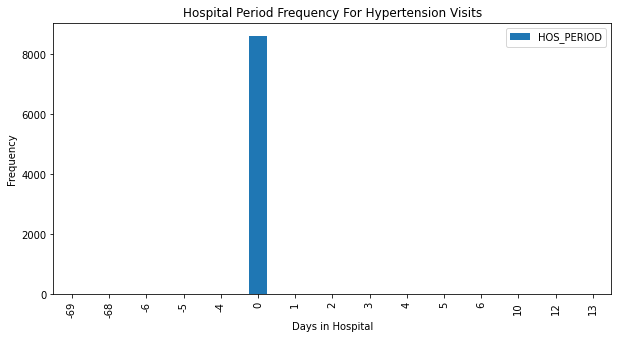

In [ ]:
df_extracted_hos.plot(kind='bar', x='DAYS', y='HOS_PERIOD', figsize=(10,5), title = 'Hospital Period Frequency For Hypertension Visits')
plt.xlabel("Days in Hospital")
plt.ylabel("Frequency")
plt.show()

### 2.Hospital period for all visits

In [ ]:
hos_period = dta[['HOS_PERIOD']]

In [ ]:
hos_period = hos_period.apply(pd.Series.value_counts)

In [ ]:
filtered_hos_period = hos_period[1:].rename_axis('DAYS').reset_index()
filtered_hos_period = filtered_hos_period[(filtered_hos_period['DAYS']>=0) & (filtered_hos_period['HOS_PERIOD']>6)]
filtered_hos_period

,DAYS,HOS_PERIOD
0,1,244
1,2,93
2,3,69
3,4,60
4,5,45
5,6,32
6,7,14
7,8,8


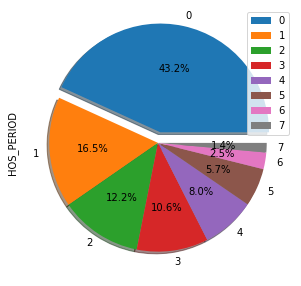

In [ ]:
explode = (0.1,0,0,0,0,0,0,0)
filtered_hos_period.plot.pie(y='HOS_PERIOD', figsize=(10, 5), shadow = True, explode = explode,autopct='%1.1f%%')
#filtered_hos_period.plot.pie(y='HOS_PERIOD', figsize=(10, 5),autopct='%1.1f%%')
plt.show()

### 3. Hospital period for each hypertension severity

In [ ]:
severity_zero = dta[dta['HYPERTENSION_SEVERITY']==0][['HOS_PERIOD']].apply(pd.Series.value_counts) # severity is 0
severity_one = dta[dta['HYPERTENSION_SEVERITY']==1][['HOS_PERIOD']].apply(pd.Series.value_counts) # severity is 1
severity_two = dta[dta['HYPERTENSION_SEVERITY']==2][['HOS_PERIOD']].apply(pd.Series.value_counts) # severity is 2
severity_three = dta[dta['HYPERTENSION_SEVERITY']==3][['HOS_PERIOD']].apply(pd.Series.value_counts) # severity is 3
filtered_severity_zero = severity_zero[1:].rename_axis('DAYS').reset_index()
filtered_severity_zero = filtered_severity_zero[(filtered_severity_zero['DAYS']>=0) & (filtered_severity_zero['HOS_PERIOD']>6)]

In [ ]:
filtered_severity_zero

,DAYS,HOS_PERIOD
0,1,69
1,2,25
2,4,21
3,3,14
4,5,13
5,6,9


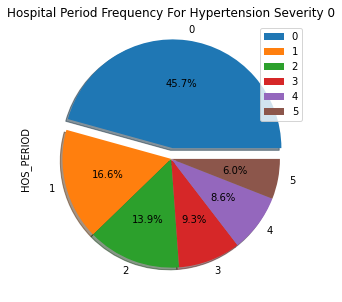

In [ ]:
explode = (0.1,0,0,0,0,0)
filtered_severity_zero.plot.pie(y='HOS_PERIOD', figsize=(10,5), shadow = True, explode = explode,autopct='%1.1f%%')
plt.title('Hospital Period Frequency For Hypertension Severity 0')
plt.show()

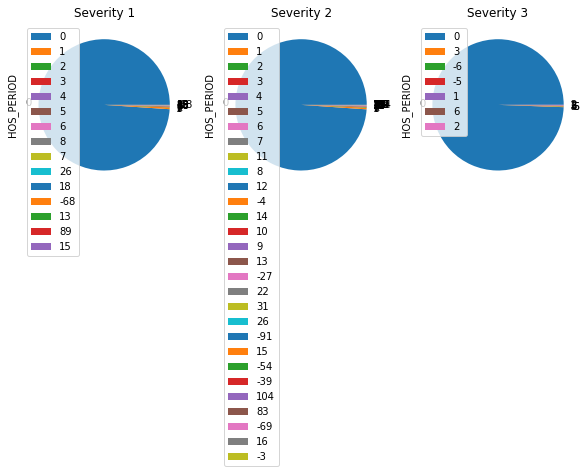

In [ ]:
fig, ((ax0, ax1, ax2)) = plt.subplots(nrows = 1, ncols = 3, figsize=(10,6))

severity_one.plot.pie(ax=ax0, y='HOS_PERIOD', title = 'Severity 1')
severity_two.plot.pie(ax=ax1, y='HOS_PERIOD', title = 'Severity 2')
severity_three.plot.pie(ax=ax2, y='HOS_PERIOD', title = 'Severity 3')

plt.show()

In [ ]:
#CLUSTER = CLUSTER.merge(extracted_hypertension_visits.groupby('PATIENT_NUM')['HOS_PERIOD'].sum(), on = 'PATIENT_NUM')

## DIASTOLIC_BP, SYSTOLIC_BP

### Analysis

In [ ]:
non_hypertension_high_bp = dta[(dta['HYPERTENSION_VISIT']==0) & (dta['DIASTOLIC_BP']>=80) & (dta['SYSTOLIC_BP']>=130)][['DIASTOLIC_BP', 'SYSTOLIC_BP']]

In [ ]:
non_hypertension_high_bp

,DIASTOLIC_BP,SYSTOLIC_BP
code,,
1169720,94.0,164.0
8390829,80.0,135.0
14795558,82.0,160.0
14888843,80.0,160.0
22136851,80.0,136.0
...,...,...
13204544,86.0,132.0
14789293,86.0,170.0
26024981,80.0,180.0


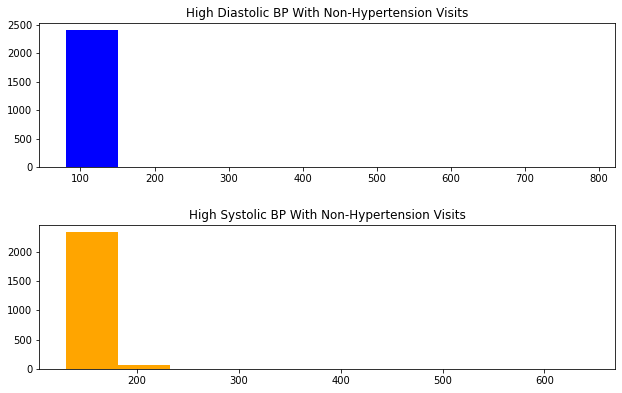

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols = 1, figsize=(10,6))
ax0.hist(non_hypertension_high_bp.DIASTOLIC_BP,color='blue')
ax0.set_title('High Diastolic BP With Non-Hypertension Visits')

ax1.hist(non_hypertension_high_bp.SYSTOLIC_BP,color='orange')
ax1.set_title('High Systolic BP With Non-Hypertension Visits')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

### Action

In [ ]:
DBP_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['DIASTOLIC_BP'].notnull()]) != 0:
    DBP_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['DIASTOLIC_BP'].notnull()].to_numpy())
  else:
    DBP_time.append(np.array([1, 2, 3]))

In [ ]:
DBP_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['DIASTOLIC_BP'].notnull()]) != 0:
    DBP_value.append(dta['DIASTOLIC_BP'][dta['PATIENT_NUM'] == patient][dta['DIASTOLIC_BP'].notnull()].to_numpy())
  else:
    DBP_value.append(np.array([0, 0, 0]))

In [ ]:
DBP_features_to_use = ["mean", 
                   "maximum",
                   "minimum",
                   "median",
                   "std",
                   "skew",
                   "amplitude"]

DBP = featurize.featurize_time_series(times = DBP_time, values = DBP_value,
                                     errors = None,
                                     features_to_use = DBP_features_to_use)

In [ ]:
DBP.columns = DBP.columns.get_level_values(0)

In [ ]:
DBP['DBP_Mean'] = DBP.iloc[ : , 0]
DBP['DBP_Max'] = DBP.iloc[ : , 1]
DBP['DBP_Min'] = DBP.iloc[ : , 2]
DBP['DBP_Med'] = DBP.iloc[ : , 3]
DBP['DBP_Std'] = DBP.iloc[ : , 4]
DBP['DBP_Skew'] = DBP.iloc[ : , 5]
DBP['DBP_Amp'] = DBP.iloc[ : , 6]

In [ ]:
DBP.drop(DBP.iloc[:, 0:7], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, DBP], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER

,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,...,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,DBP_Mean,DBP_Max,DBP_Min,DBP_Med,DBP_Std,DBP_Skew,DBP_Amp
PATIENT_NUM,,,,,,,,,,,,,,,,,,,,,
1091,0.0,0.000000,100.000000,0.00000,124,31.451613,0.0,0.000000,21.774194,78.225806,...,0,0,0,65.172956,82.0,48.0,64.0,7.090532,0.142367,17.0
83369,0.0,0.000000,100.000000,0.00000,310,7.096774,0.0,0.000000,0.000000,100.000000,...,0,0,0,68.859155,92.0,49.0,69.0,9.834254,0.267173,21.5
127948,0.0,0.000000,90.476190,9.52381,105,20.952381,0.0,0.000000,35.238095,64.761905,...,0,1,0,74.733333,80.0,64.0,77.0,5.323881,-0.597719,8.0
135797,0.0,0.000000,100.000000,0.00000,189,19.576720,0.0,0.000000,69.312169,30.687831,...,0,0,0,75.702703,90.0,61.0,75.0,7.790725,0.145458,14.5
157037,0.0,0.000000,100.000000,0.00000,98,4.081633,0.0,0.000000,100.000000,0.000000,...,1,1,0,84.461538,96.0,72.0,85.0,6.428487,-0.064610,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28305113,0.0,100.000000,0.000000,0.00000,60,28.333333,0.0,0.000000,76.666667,23.333333,...,0,0,0,78.681818,91.0,63.0,79.0,7.628513,-0.630156,14.0
29154764,0.0,58.426966,41.573034,0.00000,89,29.213483,0.0,5.617978,16.853933,77.528090,...,0,0,0,79.869565,92.0,70.0,80.0,6.312888,0.114358,11.0
30048752,0.0,0.000000,100.000000,0.00000,72,23.611111,0.0,0.000000,9.722222,90.277778,...,0,0,0,70.977273,81.0,51.0,72.5,7.333729,-1.044384,15.0


In [ ]:
SBP_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['SYSTOLIC_BP'].notnull()]) != 0:
    SBP_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['SYSTOLIC_BP'].notnull()].to_numpy())
  else:
    SBP_time.append(np.array([1, 2, 3]))

In [ ]:
SBP_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['SYSTOLIC_BP'].notnull()]) != 0:
    SBP_value.append(dta['SYSTOLIC_BP'][dta['PATIENT_NUM'] == patient][dta['SYSTOLIC_BP'].notnull()].to_numpy())
  else:
    SBP_value.append(np.array([0, 0, 0]))

In [ ]:
SBP_features_to_use = ["mean", 
                   "maximum",
                   "minimum",
                   "median",
                   "std",
                   "skew",
                   "amplitude"]

SBP = featurize.featurize_time_series(times = SBP_time, values = SBP_value,
                                     errors = None,
                                     features_to_use = SBP_features_to_use)

In [ ]:
SBP.columns = SBP.columns.get_level_values(0)

In [ ]:
SBP['SBP_Mean'] = SBP.iloc[ : , 0]
SBP['SBP_Max'] = SBP.iloc[ : , 1]
SBP['SBP_Min'] = SBP.iloc[ : , 2]
SBP['SBP_Med'] = SBP.iloc[ : , 3]
SBP['SBP_Std'] = SBP.iloc[ : , 4]
SBP['SBP_Skew'] = SBP.iloc[ : , 5]
SBP['SBP_Amp'] = SBP.iloc[ : , 6]

In [ ]:
SBP.drop(SBP.iloc[:, 0:7], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, SBP], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.DBP_Mean[CLUSTER.DBP_Mean < 1]

PATIENT_NUM
31151244    0.0
Name: DBP_Mean, dtype: float64

In [ ]:
CLUSTER.SBP_Mean[CLUSTER.SBP_Mean < 1]

PATIENT_NUM
31151244    0.0
Name: SBP_Mean, dtype: float64

## WEIGHT

### Action

In [ ]:
WEIGHT_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['WEIGHT'].notnull()]) != 0:
    WEIGHT_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['WEIGHT'].notnull()].to_numpy())
  else:
    WEIGHT_time.append(np.array([1, 2, 3]))

In [ ]:
WEIGHT_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['WEIGHT'].notnull()]) != 0:
    WEIGHT_value.append(dta['WEIGHT'][dta['PATIENT_NUM'] == patient][dta['WEIGHT'].notnull()].to_numpy())
  else:
    WEIGHT_value.append(np.array([0, 0, 0]))

In [ ]:
WEIGHT_features_to_use = ["mean", 
                   "maximum",
                   "minimum",
                   "median",
                   "std",
                   "skew",
                   "amplitude"]

WEIGHT = featurize.featurize_time_series(times = WEIGHT_time, values = WEIGHT_value,
                                     errors = None,
                                     features_to_use = WEIGHT_features_to_use)

In [ ]:
WEIGHT.columns = WEIGHT.columns.get_level_values(0)

In [ ]:
WEIGHT['WEIGHT_Mean'] = WEIGHT.iloc[ : , 0]
WEIGHT['WEIGHT_Max'] = WEIGHT.iloc[ : , 1]
WEIGHT['WEIGHT_Min'] = WEIGHT.iloc[ : , 2]
WEIGHT['WEIGHT_Med'] = WEIGHT.iloc[ : , 3]
WEIGHT['WEIGHT_Std'] = WEIGHT.iloc[ : , 4]
WEIGHT['WEIGHT_Skew'] = WEIGHT.iloc[ : , 5]
WEIGHT['WEIGHT_Amp'] = WEIGHT.iloc[ : , 6]

In [ ]:
WEIGHT.drop(WEIGHT.iloc[:, 0:7], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, WEIGHT], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.WEIGHT_Mean[CLUSTER.WEIGHT_Mean < 1]

PATIENT_NUM
4065771     0.0
31151244    0.0
Name: WEIGHT_Mean, dtype: float64

## HEIGHT

### Action

In [ ]:
HEIGHT_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['HEIGHT'].notnull()]) != 0:
    HEIGHT_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['HEIGHT'].notnull()].to_numpy())
  else:
    HEIGHT_time.append(np.array([1, 2, 3]))

In [ ]:
count = -1
for patient in HEIGHT_time:
  count += 1
  if len(patient) == 1:
    HEIGHT_time[count] = np.append(patient, patient[0] + 1)

In [ ]:
HEIGHT_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['HEIGHT'].notnull()]) != 0:
    HEIGHT_value.append(dta['HEIGHT'][dta['PATIENT_NUM'] == patient][dta['HEIGHT'].notnull()].to_numpy())
  else:
    HEIGHT_value.append(np.array([0, 0, 0]))

In [ ]:
count = -1
for patient in HEIGHT_value:
  count += 1
  if len(patient) == 1:
    HEIGHT_value[count] = np.append(patient, patient[0])

In [ ]:
HEIGHT_features_to_use = ["mean"]
HEIGHT = featurize.featurize_time_series(times = HEIGHT_time, values = HEIGHT_value, errors = None, features_to_use = HEIGHT_features_to_use)

In [ ]:
HEIGHT.columns = HEIGHT.columns.get_level_values(0)

In [ ]:
HEIGHT['HEIGHT_Mean'] = HEIGHT.iloc[ : , 0]

In [ ]:
HEIGHT.drop(HEIGHT.iloc[:, 0:1], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, HEIGHT], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.HEIGHT_Mean[CLUSTER.HEIGHT_Mean < 1]

PATIENT_NUM
1091        0.0
616314      0.0
1015269     0.0
1187033     0.0
1612002     0.0
2453806     0.0
2683317     0.0
3383701     0.0
3410952     0.0
4192172     0.0
4253007     0.0
4752824     0.0
5025531     0.0
5077289     0.0
5126525     0.0
5498427     0.0
5643472     0.0
5692769     0.0
5804910     0.0
5944073     0.0
6268814     0.0
6290903     0.0
6444150     0.0
12074485    0.0
12193633    0.0
12200731    0.0
12828858    0.0
13474193    0.0
13774933    0.0
13977031    0.0
22012456    0.0
22200137    0.0
22721278    0.0
25778344    0.0
25827374    0.0
26129495    0.0
26210913    0.0
27077072    0.0
27251574    0.0
28305113    0.0
31151244    0.0
Name: HEIGHT_Mean, dtype: float64

In [ ]:
CLUSTER.drop('HEIGHT_Mean', axis = 1, inplace = True)

## TEMPERATURE

### Action

In [ ]:
TEMP_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['TEMPERATURE'].notnull()]) != 0:
    TEMP_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['TEMPERATURE'].notnull()].to_numpy())
  else:
    TEMP_time.append(np.array([1, 2, 3]))

In [ ]:
count = -1
for patient in TEMP_time:
  count += 1
  if len(patient) == 1:
    TEMP_time[count] = np.append(patient, patient[0] + 1)

In [ ]:
TEMP_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['TEMPERATURE'].notnull()]) != 0:
    TEMP_value.append(dta['TEMPERATURE'][dta['PATIENT_NUM'] == patient][dta['TEMPERATURE'].notnull()].to_numpy())
  else:
    TEMP_value.append(np.array([0, 0, 0]))

In [ ]:
count = -1
for patient in TEMP_value:
  count += 1
  if len(patient) == 1:
    TEMP_value[count] = np.append(patient, patient[0])

In [ ]:
TEMP_features_to_use = ["mean"]
TEMP = featurize.featurize_time_series(times = TEMP_time, values = TEMP_value, errors = None, features_to_use = TEMP_features_to_use)

In [ ]:
TEMP.columns = TEMP.columns.get_level_values(0)

In [ ]:
TEMP['TEMP_Mean'] = TEMP.iloc[ : , 0]

In [ ]:
TEMP.drop(TEMP.iloc[:, 0:1], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, TEMP], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.TEMP_Mean[CLUSTER.TEMP_Mean < 1]

PATIENT_NUM
5643472     0.0
28305113    0.0
31151244    0.0
Name: TEMP_Mean, dtype: float64

## PULSE

### Action

In [ ]:
PULSE_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['PULSE'].notnull()]) != 0:
    PULSE_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['PULSE'].notnull()].to_numpy())
  else:
    PULSE_time.append(np.array([1, 2, 3]))

In [ ]:
count = -1
for patient in PULSE_time:
  count += 1
  if len(patient) == 1:
    PULSE_time[count] = np.append(patient, patient[0] + 1)

In [ ]:
PULSE_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['PULSE'].notnull()]) != 0:
    PULSE_value.append(dta['PULSE'][dta['PATIENT_NUM'] == patient][dta['PULSE'].notnull()].to_numpy())
  else:
    PULSE_value.append(np.array([0, 0, 0]))

In [ ]:
count = -1
for patient in PULSE_value:
  count += 1
  if len(patient) == 1:
    PULSE_value[count] = np.append(patient, patient[0])

In [ ]:
PULSE_features_to_use = ["mean"]
PULSE = featurize.featurize_time_series(times = PULSE_time, values = PULSE_value, errors = None, features_to_use = PULSE_features_to_use)

In [ ]:
PULSE.columns = PULSE.columns.get_level_values(0)

In [ ]:
PULSE['PULSE_Mean'] = PULSE.iloc[ : , 0]

In [ ]:
PULSE.drop(PULSE.iloc[:, 0:1], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, PULSE], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.PULSE_Mean[CLUSTER.PULSE_Mean < 1]

PATIENT_NUM
31151244    0.0
Name: PULSE_Mean, dtype: float64

## RESPIRATION

### Action

In [ ]:
RESPIRATION_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['RESPIRATION'].notnull()]) != 0:
    RESPIRATION_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['RESPIRATION'].notnull()].to_numpy())
  else:
    RESPIRATION_time.append(np.array([1, 2, 3]))

In [ ]:
count = -1
for patient in RESPIRATION_time:
  count += 1
  if len(patient) == 1:
    RESPIRATION_time[count] = np.append(patient, patient[0] + 1)

In [ ]:
RESPIRATION_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['RESPIRATION'].notnull()]) != 0:
    RESPIRATION_value.append(dta['RESPIRATION'][dta['PATIENT_NUM'] == patient][dta['RESPIRATION'].notnull()].to_numpy())
  else:
    RESPIRATION_value.append(np.array([0, 0, 0]))

In [ ]:
count = -1
for patient in RESPIRATION_value:
  count += 1
  if len(patient) == 1:
    RESPIRATION_value[count] = np.append(patient, patient[0])

In [ ]:
RESPIRATION_features_to_use = ["mean"]
RESPIRATION = featurize.featurize_time_series(times = RESPIRATION_time, values = RESPIRATION_value, errors = None, features_to_use = RESPIRATION_features_to_use)

In [ ]:
RESPIRATION.columns = RESPIRATION.columns.get_level_values(0)

In [ ]:
RESPIRATION['RESPIRATION_Mean'] = RESPIRATION.iloc[ : , 0]

In [ ]:
RESPIRATION.drop(RESPIRATION.iloc[:, 0:1], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, RESPIRATION], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.RESPIRATION_Mean[CLUSTER.RESPIRATION_Mean < 1]

PATIENT_NUM
1091        0.0
83369       0.0
157037      0.0
306270      0.0
308853      0.0
           ... 
27330401    0.0
28305113    0.0
29154764    0.0
30048752    0.0
31151244    0.0
Name: RESPIRATION_Mean, Length: 111, dtype: float64

In [ ]:
CLUSTER.drop('RESPIRATION_Mean', axis = 1, inplace = True)

## PULSEOXYGEN

### Action

In [ ]:
PULSEOXYGEN_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['PULSEOXYGEN'].notnull()]) != 0:
    PULSEOXYGEN_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['PULSEOXYGEN'].notnull()].to_numpy())
  else:
    PULSEOXYGEN_time.append(np.array([1, 2, 3]))

In [ ]:
count = -1
for patient in PULSEOXYGEN_time:
  count += 1
  if len(patient) == 1:
    PULSEOXYGEN_time[count] = np.append(patient, patient[0] + 1)

In [ ]:
PULSEOXYGEN_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['PULSEOXYGEN'].notnull()]) != 0:
    PULSEOXYGEN_value.append(dta['PULSEOXYGEN'][dta['PATIENT_NUM'] == patient][dta['PULSEOXYGEN'].notnull()].to_numpy())
  else:
    PULSEOXYGEN_value.append(np.array([0, 0, 0]))

In [ ]:
count = -1
for patient in PULSEOXYGEN_value:
  count += 1
  if len(patient) == 1:
    PULSEOXYGEN_value[count] = np.append(patient, patient[0])

In [ ]:
PULSEOXYGEN_features_to_use = ["mean"]
PULSEOXYGEN = featurize.featurize_time_series(times = PULSEOXYGEN_time, values = PULSEOXYGEN_value, errors = None, features_to_use = PULSEOXYGEN_features_to_use)

In [ ]:
PULSEOXYGEN.columns = PULSEOXYGEN.columns.get_level_values(0)

In [ ]:
PULSEOXYGEN['PULSEOXYGEN_Mean'] = PULSEOXYGEN.iloc[ : , 0]

In [ ]:
PULSEOXYGEN.drop(PULSEOXYGEN.iloc[:, 0:1], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, PULSEOXYGEN], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.PULSEOXYGEN_Mean[CLUSTER.PULSEOXYGEN_Mean < 1]

PATIENT_NUM
157037      0.0
308853      0.0
463576      0.0
474632      0.0
542132      0.0
           ... 
27251574    0.0
28305113    0.0
29154764    0.0
30048752    0.0
31151244    0.0
Name: PULSEOXYGEN_Mean, Length: 82, dtype: float64

In [ ]:
CLUSTER.drop('PULSEOXYGEN_Mean', axis = 1, inplace = True)

In [ ]:
CLUSTER.loc[31151244, :]

Unknown %                    0.0
Red %                        0.0
Yellow %                   100.0
Green %                      0.0
Total_Number_of_Visits       5.0
Hypertension_Visits %       20.0
HST Unknown %                0.0
HST Red %                    0.0
HST Yellow %                 0.0
HST Green %                100.0
Years                        1.0
GENDER                       2.0
AGE                         60.0
FAMILY_HYPERTENSION_NUM      0.0
NON_SMOKER                   0.0
NON_DRINKER                  0.0
REGULAR_EXERCISER            0.0
NON_ALLERGY                  1.0
DBP_Mean                     0.0
DBP_Max                      0.0
DBP_Min                      0.0
DBP_Med                      0.0
DBP_Std                      0.0
DBP_Skew                     0.0
DBP_Amp                      0.0
SBP_Mean                     0.0
SBP_Max                      0.0
SBP_Min                      0.0
SBP_Med                      0.0
SBP_Std                      0.0
SBP_Skew  

# K-Means Clustering

In [ ]:
CLUSTER

,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,...,SBP_Amp,WEIGHT_Mean,WEIGHT_Max,WEIGHT_Min,WEIGHT_Med,WEIGHT_Std,WEIGHT_Skew,WEIGHT_Amp,TEMP_Mean,PULSE_Mean
PATIENT_NUM,,,,,,,,,,,,,,,,,,,,,
1091,0.0,0.000000,100.000000,0.00000,124,31.451613,0.0,0.000000,21.774194,78.225806,...,40.0,168.416667,171.0,158.0,169.00,3.248931,-2.657335,6.50,97.740000,67.691824
83369,0.0,0.000000,100.000000,0.00000,310,7.096774,0.0,0.000000,0.000000,100.000000,...,31.0,135.650000,154.0,118.6,132.00,10.356375,0.705737,17.70,98.560000,89.750000
127948,0.0,0.000000,90.476190,9.52381,105,20.952381,0.0,0.000000,35.238095,64.761905,...,21.5,183.722222,197.0,163.0,184.75,9.903080,-0.655942,17.00,86.933333,58.666667
135797,0.0,0.000000,100.000000,0.00000,189,19.576720,0.0,0.000000,69.312169,30.687831,...,27.5,218.122727,227.0,194.0,223.50,9.764171,-1.320585,16.50,98.517647,86.166667
157037,0.0,0.000000,100.000000,0.00000,98,4.081633,0.0,0.000000,100.000000,0.000000,...,10.0,185.818182,192.0,182.0,185.00,4.018552,0.418803,5.00,99.050000,95.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28305113,0.0,100.000000,0.000000,0.00000,60,28.333333,0.0,0.000000,76.666667,23.333333,...,25.0,190.500000,200.5,178.0,191.00,8.972179,-0.334960,11.25,0.000000,75.090909
29154764,0.0,58.426966,41.573034,0.00000,89,29.213483,0.0,5.617978,16.853933,77.528090,...,31.0,153.600000,162.0,146.0,149.00,6.945502,0.329359,8.00,98.300000,82.173913
30048752,0.0,0.000000,100.000000,0.00000,72,23.611111,0.0,0.000000,9.722222,90.277778,...,23.0,188.625000,192.5,183.0,189.50,3.542157,-0.636788,4.75,98.125000,64.863636


In [ ]:
CLUSTER.columns

Index(['Unknown %', 'Red %', 'Yellow %', 'Green %', 'Total_Number_of_Visits',
       'Hypertension_Visits %', 'HST Unknown %', 'HST Red %', 'HST Yellow %',
       'HST Green %', 'Years', 'GENDER', 'AGE', 'FAMILY_HYPERTENSION_NUM',
       'NON_SMOKER', 'NON_DRINKER', 'REGULAR_EXERCISER', 'NON_ALLERGY',
       'DBP_Mean', 'DBP_Max', 'DBP_Min', 'DBP_Med', 'DBP_Std', 'DBP_Skew',
       'DBP_Amp', 'SBP_Mean', 'SBP_Max', 'SBP_Min', 'SBP_Med', 'SBP_Std',
       'SBP_Skew', 'SBP_Amp', 'WEIGHT_Mean', 'WEIGHT_Max', 'WEIGHT_Min',
       'WEIGHT_Med', 'WEIGHT_Std', 'WEIGHT_Skew', 'WEIGHT_Amp', 'TEMP_Mean',
       'PULSE_Mean'],
      dtype='object')

In [ ]:
CLUSTER['Hypertension_Visits %'].fillna(CLUSTER['Hypertension_Visits %'].mean(), inplace=True)

In [ ]:
# Remove NON_SMOKER and NON_DRINKER since error will return after running kmeans:
# ERROR: '<' not supported between instances of 'int' and 'NoneType'
#CLUSTER_COPY= CLUSTER.drop(columns=['NON_SMOKER','NON_DRINKER'])

In [ ]:
# Find optimal number of clusters for patients in Kmeans
def optimal_patients_clusters(df):
  # standarize whole dataframe
  scaler = MinMaxScaler()
  standardized_data = scaler.fit_transform(df)
  standardized_df = pd.DataFrame(standardized_data, columns=df.columns, index=df.index)

  # get each's SSE values of each k
  sse = []
  K = list(range(1,11))
  for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(standardized_df)
    sse.append(kmeans.inertia_)
  
  # Scree Plot
  plt.figure(figsize=(20,7))
  plt.plot(K, sse, 'bx-')
  plt.xlabel('K')
  plt.ylabel('SSE')
  plt.xticks(K)
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

  # get best k-group by elbow rule
  kl = KneeLocator(K, sse, curve="convex", direction="decreasing") 
  optimal_cluster = kl.elbow
  print("Suggested Optimal K is:", optimal_cluster)

  # fit Kmeans into target df with best k
  km = KMeans(n_clusters=optimal_cluster, random_state=1)
  km.fit(standardized_df)
  predict=km.predict(standardized_df)

  df_new = df.copy()
  df_new['cluster'] = pd.Series(predict, index=df_new.index)
  return df_new

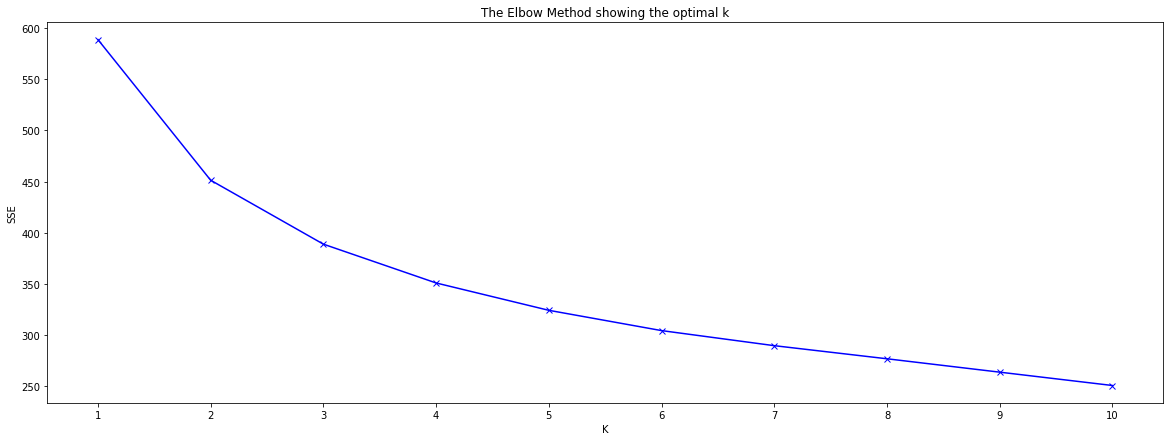

Suggested Optimal K is: 4


In [ ]:
#test kmeans function
CLUSTER_KMEANS = optimal_patients_clusters(CLUSTER)

In [ ]:
CLUSTER_KMEANS['cluster'].value_counts()

0    101
2     90
1     54
3     33
Name: cluster, dtype: int64

In [ ]:
CLUSTER_KMEANS

,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,...,WEIGHT_Mean,WEIGHT_Max,WEIGHT_Min,WEIGHT_Med,WEIGHT_Std,WEIGHT_Skew,WEIGHT_Amp,TEMP_Mean,PULSE_Mean,cluster
PATIENT_NUM,,,,,,,,,,,,,,,,,,,,,
1091,0.0,0.000000,100.000000,0.00000,124,31.451613,0.0,0.000000,21.774194,78.225806,...,168.416667,171.0,158.0,169.00,3.248931,-2.657335,6.50,97.740000,67.691824,0
83369,0.0,0.000000,100.000000,0.00000,310,7.096774,0.0,0.000000,0.000000,100.000000,...,135.650000,154.0,118.6,132.00,10.356375,0.705737,17.70,98.560000,89.750000,0
127948,0.0,0.000000,90.476190,9.52381,105,20.952381,0.0,0.000000,35.238095,64.761905,...,183.722222,197.0,163.0,184.75,9.903080,-0.655942,17.00,86.933333,58.666667,2
135797,0.0,0.000000,100.000000,0.00000,189,19.576720,0.0,0.000000,69.312169,30.687831,...,218.122727,227.0,194.0,223.50,9.764171,-1.320585,16.50,98.517647,86.166667,0
157037,0.0,0.000000,100.000000,0.00000,98,4.081633,0.0,0.000000,100.000000,0.000000,...,185.818182,192.0,182.0,185.00,4.018552,0.418803,5.00,99.050000,95.727273,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28305113,0.0,100.000000,0.000000,0.00000,60,28.333333,0.0,0.000000,76.666667,23.333333,...,190.500000,200.5,178.0,191.00,8.972179,-0.334960,11.25,0.000000,75.090909,3
29154764,0.0,58.426966,41.573034,0.00000,89,29.213483,0.0,5.617978,16.853933,77.528090,...,153.600000,162.0,146.0,149.00,6.945502,0.329359,8.00,98.300000,82.173913,0
30048752,0.0,0.000000,100.000000,0.00000,72,23.611111,0.0,0.000000,9.722222,90.277778,...,188.625000,192.5,183.0,189.50,3.542157,-0.636788,4.75,98.125000,64.863636,2


# EDA: PLAN (Word cloud)

In [ ]:
dta.columns

Index(['index', 'PATIENT_NUM', 'ADMIT_DATE', 'DISCH_DATE', 'GENDER',
       'VISIT_TYPE', 'AGE', 'FAMILY_HYPERTENSION_NUM', 'HYPERTENSION_VISIT',
       'HYPERTENSION_SEVERITY', 'HYPERTENSION_STATUS', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'WEIGHT', 'HEIGHT', 'TEMPERATURE', 'PULSE',
       'PULSE_DESCRIPTION', 'BP_CUFF_SIZE', 'RESPIRATION',
       'RESPIRATION_DESCRIPTION', 'PULSEOXYGEN', 'PULSEOXYGEN_DESCRIPTION',
       'BMI', 'NON_SMOKER', 'NON_DRINKER', 'REGULAR_EXERCISER', 'NON_ALLERGY',
       'HOS_PERIOD'],
      dtype='object')

In [ ]:
df = dta.reset_index()

In [ ]:
df_plan_merge = pd.merge(plan, df)

In [ ]:
df_plan_merge.head()

,code,PLAN_TITLE,PLAN_ADJUD_RESULT_DETAIL,index,PATIENT_NUM,ADMIT_DATE,DISCH_DATE,GENDER,VISIT_TYPE,AGE,...,RESPIRATION,RESPIRATION_DESCRIPTION,PULSEOXYGEN,PULSEOXYGEN_DESCRIPTION,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD
0,1167600,Stool Cards,NaN,6,1166159,1997-02-25,1997-02-25,1,7.0,75.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1,1167600,Sigmoidoscope,NaN,6,1166159,1997-02-25,1997-02-25,1,7.0,75.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
2,1167600,X-Ray of Abdomen,NaN,6,1166159,1997-02-25,1997-02-25,1,7.0,75.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
3,1167600,Thallium Treadmill,NaN,6,1166159,1997-02-25,1997-02-25,1,7.0,75.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
4,1167600,Chest X-Ray,NaN,6,1166159,1997-02-25,1997-02-25,1,7.0,75.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0


In [ ]:
len(df_plan_merge ['HYPERTENSION_SEVERITY'].unique())

4

In [ ]:
plan2 = df_plan_merge[df_plan_merge['HYPERTENSION_VISIT']==1]

In [ ]:
# Looking at first 5 rows of the dataset
plan2.head()

,code,PLAN_TITLE,PLAN_ADJUD_RESULT_DETAIL,index,PATIENT_NUM,ADMIT_DATE,DISCH_DATE,GENDER,VISIT_TYPE,AGE,...,RESPIRATION,RESPIRATION_DESCRIPTION,PULSEOXYGEN,PULSEOXYGEN_DESCRIPTION,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD
0,1167600,Stool Cards,NaN,6,1166159,1997-02-25,1997-02-25,1,7.0,75.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1,1167600,Sigmoidoscope,NaN,6,1166159,1997-02-25,1997-02-25,1,7.0,75.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
2,1167600,X-Ray of Abdomen,NaN,6,1166159,1997-02-25,1997-02-25,1,7.0,75.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
3,1167600,Thallium Treadmill,NaN,6,1166159,1997-02-25,1997-02-25,1,7.0,75.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
4,1167600,Chest X-Ray,NaN,6,1166159,1997-02-25,1997-02-25,1,7.0,75.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0


In [ ]:
print("There are {} observations and {} features in this dataset. \n".format(plan.shape[0],plan.shape[1]))

print("There are {} types of plan in this dataset such as {}... \n".format(len(plan.PLAN_TITLE.unique()),
                                                                           ", ".join(plan.PLAN_TITLE.unique()[0:5])))


There are 171371 observations and 3 features in this dataset. 

There are 2849 types of plan in this dataset such as Stool Cards, Sigmoidoscope, X-Ray of Abdomen, Thallium Treadmill, Chest X-Ray... 



## Plan Word Cloud with only hypertension visit

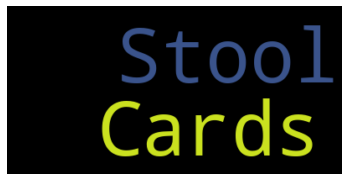

In [ ]:
# Start with one PLAN TITLE:
text = plan2.PLAN_TITLE[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
plan2.PLAN_TITLE = str(plan2.PLAN_TITLE)

In [ ]:
text = " ".join(PLAN for PLAN in plan2.PLAN_TITLE)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 14429549 words in the combination of all review.


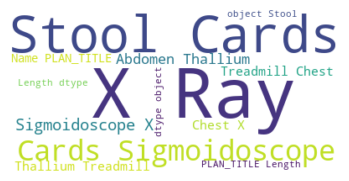

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["COUNT", "EXAM", "PLAN", "NaN"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# EDA: MEDICATION

In [ ]:
df_med_merge = pd.merge(med, df)

In [ ]:
df_med_merge.head()

,code,MED_NAME,MED_SOURCE,MED_PERIOD_IN_DAYS,index,PATIENT_NUM,ADMIT_DATE,DISCH_DATE,GENDER,VISIT_TYPE,...,RESPIRATION,RESPIRATION_DESCRIPTION,PULSEOXYGEN,PULSEOXYGEN_DESCRIPTION,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD
0,1166543,Biaxin,IMOMED,0_100,2,1166159,1996-03-25,1996-03-25,1,6.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1,1169007,Noroxin,IMOMED,0_100,12,1166159,1998-01-08,1998-01-08,1,6.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
2,1171102,Hydrochlorothiazide,IMOMED,0_100,40,1166159,1999-10-29,1999-10-29,1,6.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
3,1171102,Norvasc,IMOMED,0_100,40,1166159,1999-10-29,1999-10-29,1,6.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
4,1171408,Norvasc,IMOMED,0_100,43,1166159,2000-01-03,2000-01-03,1,6.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0


## Days in Hospital with only hypertension visits

In [ ]:
med2 = df_med_merge[df_med_merge['HYPERTENSION_VISIT']==1]

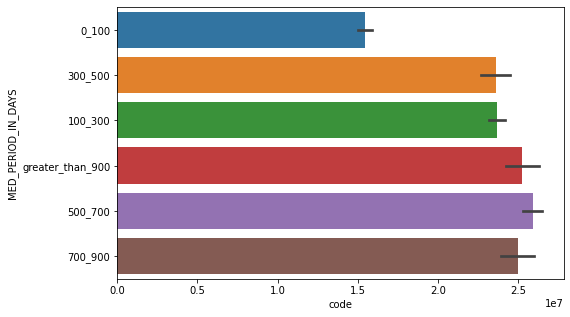

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# who v/s fare barplot
sns.barplot(x = 'code',
            y = 'MED_PERIOD_IN_DAYS',
            #hue = 'MED_SOURCE',
            data = med2)
            #orient = 'h')
 
# Show the plot
plt.show()

## Top 10 Medication used with only Hypertension Visits

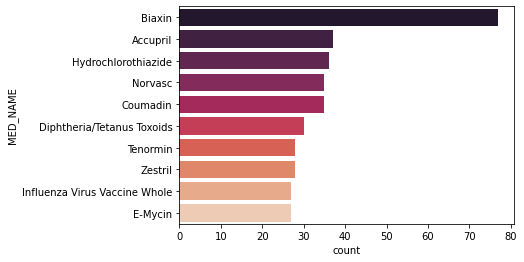

In [ ]:
#Top 10 count medication used
sns.countplot(y= med2.MED_NAME, order=med2.MED_NAME.value_counts().iloc[:10].index, palette='rocket')


## Biaxin, Prednisone, Flovent, Serevent, Doxicycline, Ventolin, Atrovent, Floxin, Atarax, 

# EDA: EXAM

In [ ]:
df_exam_merge = pd.merge(exam, df)

In [ ]:
df_exam_merge.head()

,code,EXAM_TITLE,EXAM_OVERALL,index,PATIENT_NUM,ADMIT_DATE,DISCH_DATE,GENDER,VISIT_TYPE,AGE,...,RESPIRATION,RESPIRATION_DESCRIPTION,PULSEOXYGEN,PULSEOXYGEN_DESCRIPTION,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD
0,16420526,General,NaN,80,1166159,2004-09-01,2004-09-01,1,6.0,80.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1,16420526,HEENT,NaN,80,1166159,2004-09-01,2004-09-01,1,6.0,80.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
2,16420526,Chest,Clear to Auscultation Bilaterally,80,1166159,2004-09-01,2004-09-01,1,6.0,80.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
3,16420526,Heart,.Normal,80,1166159,2004-09-01,2004-09-01,1,6.0,80.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
4,16420526,Abdomen,NaN,80,1166159,2004-09-01,2004-09-01,1,6.0,80.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0


In [ ]:
exam2 = df_exam_merge[df_exam_merge['HYPERTENSION_VISIT']==1]

In [ ]:
exam2.EXAM_TITLE = str(exam2.EXAM_TITLE)

In [ ]:
text2 = " ".join(EXAM for EXAM in exam2.EXAM_TITLE)
print ("There are {} words in the combination of all exams.".format(len(text2)))

There are 6749561 words in the combination of all exams.


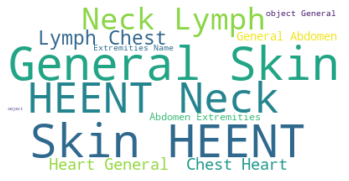

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["COUNT", "EXAM", "PLAN","EXAM_TITLE", "Length", "dtype"])

# Generate a word cloud image
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white").generate(text2)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# EDA: ROS

In [ ]:
df_ros_merge = pd.merge(ros, df)

In [ ]:
df_ros_merge.head()

,code,ROS_TITLE,ROS_OVERALL,index,PATIENT_NUM,ADMIT_DATE,DISCH_DATE,GENDER,VISIT_TYPE,AGE,...,RESPIRATION,RESPIRATION_DESCRIPTION,PULSEOXYGEN,PULSEOXYGEN_DESCRIPTION,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD
0,25756568,GENERAL,Negative for,109,1166159,2006-07-17,2006-07-17,1,2.0,85.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1,25756568,HEAD AND NECK,Negative for,109,1166159,2006-07-17,2006-07-17,1,2.0,85.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
2,25756568,EYES,Negative for,109,1166159,2006-07-17,2006-07-17,1,2.0,85.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
3,25756568,ENT,NaN,109,1166159,2006-07-17,2006-07-17,1,2.0,85.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
4,25756568,CARDIOVASCULAR,Negative for,109,1166159,2006-07-17,2006-07-17,1,2.0,85.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0


In [ ]:
ros2 = df_ros_merge[df_ros_merge['HYPERTENSION_VISIT']==1]

In [ ]:
ros2.ROS_TITLE = str(ros2.ROS_TITLE)

In [ ]:
text3 = " ".join(ROS for ROS in ros2.ROS_TITLE)
print ("There are {} words in the combination of all exams.".format(len(text3)))

There are 6680006 words in the combination of all exams.


## ROS words mentioned with only Hypertension visits

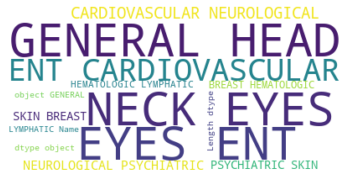

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["COUNT", "EXAM", "PLAN","Systems review","systems","review","ROS_TITLE"])

# Generate a word cloud image
wordcloud3 = WordCloud(stopwords=stopwords, background_color="white").generate(text3)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

# EDA: Immune Word Cloud

In [ ]:
df_imm_merge = pd.merge(immune, df)

In [ ]:
immune.head()

,code,IMMUNE_HX_TITLE
0,1167600,Pneumococcal Vaccination -
1,1167600,Tetanus Vaccination -
2,1168513,Tetanus Vaccination - Moderate local reaction
3,1169922,Influenza Vaccination - XXXXXXXXXXXX
4,12262289,Influenza Vaccination - XXXXXXXXXXXX


In [ ]:
df_imm_merge.head()

,code,IMMUNE_HX_TITLE,index,PATIENT_NUM,ADMIT_DATE,DISCH_DATE,GENDER,VISIT_TYPE,AGE,FAMILY_HYPERTENSION_NUM,...,RESPIRATION,RESPIRATION_DESCRIPTION,PULSEOXYGEN,PULSEOXYGEN_DESCRIPTION,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD
0,1167600,Pneumococcal Vaccination -,6,1166159,1997-02-25,1997-02-25,1,7.0,75.0,1,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1,1167600,Tetanus Vaccination -,6,1166159,1997-02-25,1997-02-25,1,7.0,75.0,1,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
2,1168513,Tetanus Vaccination - Moderate local reaction,8,1166159,1997-08-27,1997-08-27,1,2.0,75.0,1,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
3,1169922,Influenza Vaccination - XXXXXXXXXXXX,27,1166159,1999-05-13,1999-05-13,1,2.0,80.0,1,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
4,12262289,Influenza Vaccination - XXXXXXXXXXXX,63,1166159,2001-11-02,2001-11-02,1,7.0,80.0,1,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0


In [ ]:
immune = df_imm_merge[df_imm_merge['HYPERTENSION_VISIT']==1]

In [ ]:
immune.IMMUNE_HX_TITLE = str(immune.IMMUNE_HX_TITLE)

In [ ]:
text4 = " ".join(IMM for IMM in immune.IMMUNE_HX_TITLE)
print ("There are {} words in the combination of all exams.".format(len(text4)))

There are 1136489 words in the combination of all exams.


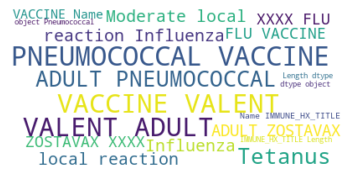

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["COUNT", "EXAM", "PLAN","Systems review","systems","review","XXXXXXXXXXXX","Vaccination"])

# Generate a word cloud image
wordcloud4 = WordCloud(stopwords=stopwords, background_color="white").generate(text4)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

# EDA: Allegergy Frequency

In [ ]:
df_allergy_merge = pd.merge(allergy, df)

In [ ]:
allergy.head()

,code,ALLERGY_DESCRIPTION
0,1167065,Codeine
1,1170680,Plendl
2,1170979,Sular
3,1172314,Toprol XL
4,1172314,Toprol XL


In [ ]:
allergy2 = df_allergy_merge[df_allergy_merge['HYPERTENSION_VISIT']==1]

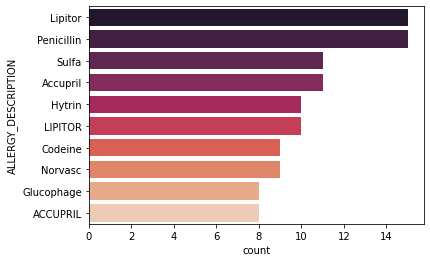

In [ ]:
#Top 10 count medication used
sns.countplot(y= allergy2.ALLERGY_DESCRIPTION, order=allergy2.ALLERGY_DESCRIPTION.value_counts().iloc[2:12].index, palette='rocket')

In [ ]:
data_frames = [df, med, exam, plan, ros]

In [ ]:
#df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['code'], how='left'), data_frames)

In [ ]:
#len(df_merged ['HYPERTENSION_SEVERITY'].unique())

In [ ]:
#df_merged.to_csv(r'/drive/MyDrive/MSCA_Capstone_Project/Data/Data_w_plan_med_exam_ros.csv', index=False)

In [ ]:
#df_merged

# Cleaned Clustered Data

In [ ]:
dta = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/cleaned_dta.csv')

In [ ]:
CleanedClusteredDta = pd.merge(dta, CLUSTER_KMEANS[['cluster']], on='PATIENT_NUM', how='left')

In [ ]:
CleanedClusteredDta.to_csv(r'/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/CleanedClusteredDta.csv', index=False)

## Divide into 4 groups

In [ ]:
first_group = CleanedClusteredDta[CleanedClusteredDta['cluster']==0]
second_group = CleanedClusteredDta[CleanedClusteredDta['cluster']==1]
third_group = CleanedClusteredDta[CleanedClusteredDta['cluster']==2]
fourth_group = CleanedClusteredDta[CleanedClusteredDta['cluster']==3]